In [1]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
housing=pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
housing2=housing[[ 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

/home/ganesh/anaconda3/envs/env_3_6/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ganesh/anaconda3/envs/env_3_6/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


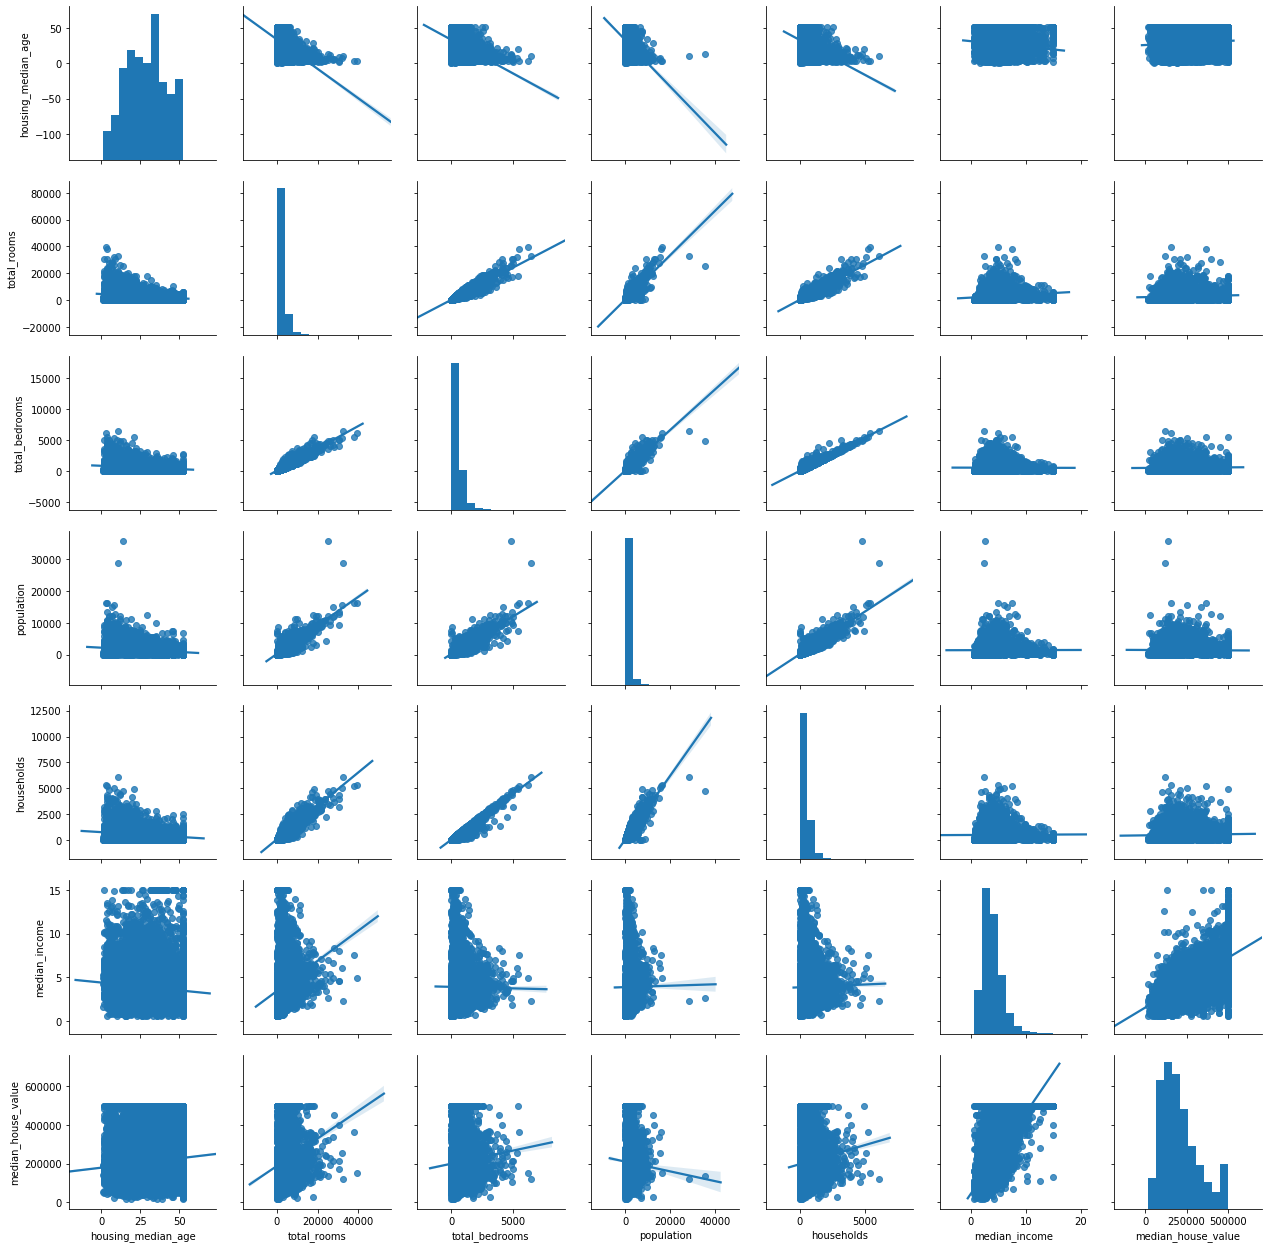

In [28]:
sns.pairplot(housing2, kind="reg")

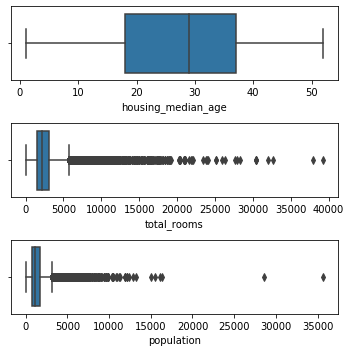

In [18]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(housing2['housing_median_age'], ax = axs[0])
plt2 = sns.boxplot(housing2['total_rooms'], ax = axs[1])
plt3 = sns.boxplot(housing2['population'], ax = axs[2])
plt.tight_layout()

In [20]:
housing2.isnull().sum()*100/housing.shape[0]

housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
dtype: float64

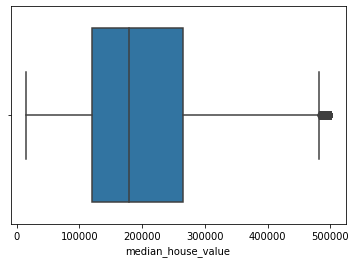

In [21]:
sns.boxplot(housing2.median_house_value)

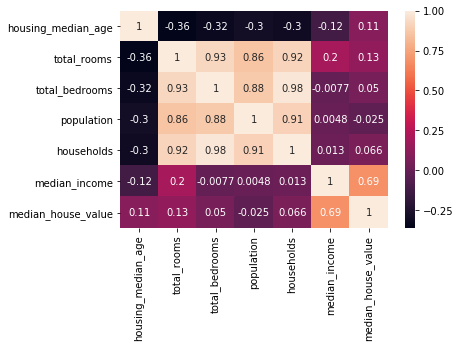

In [22]:
sns.heatmap(housing2.corr(),annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f645ccdd4e0>,
      dtype=object)

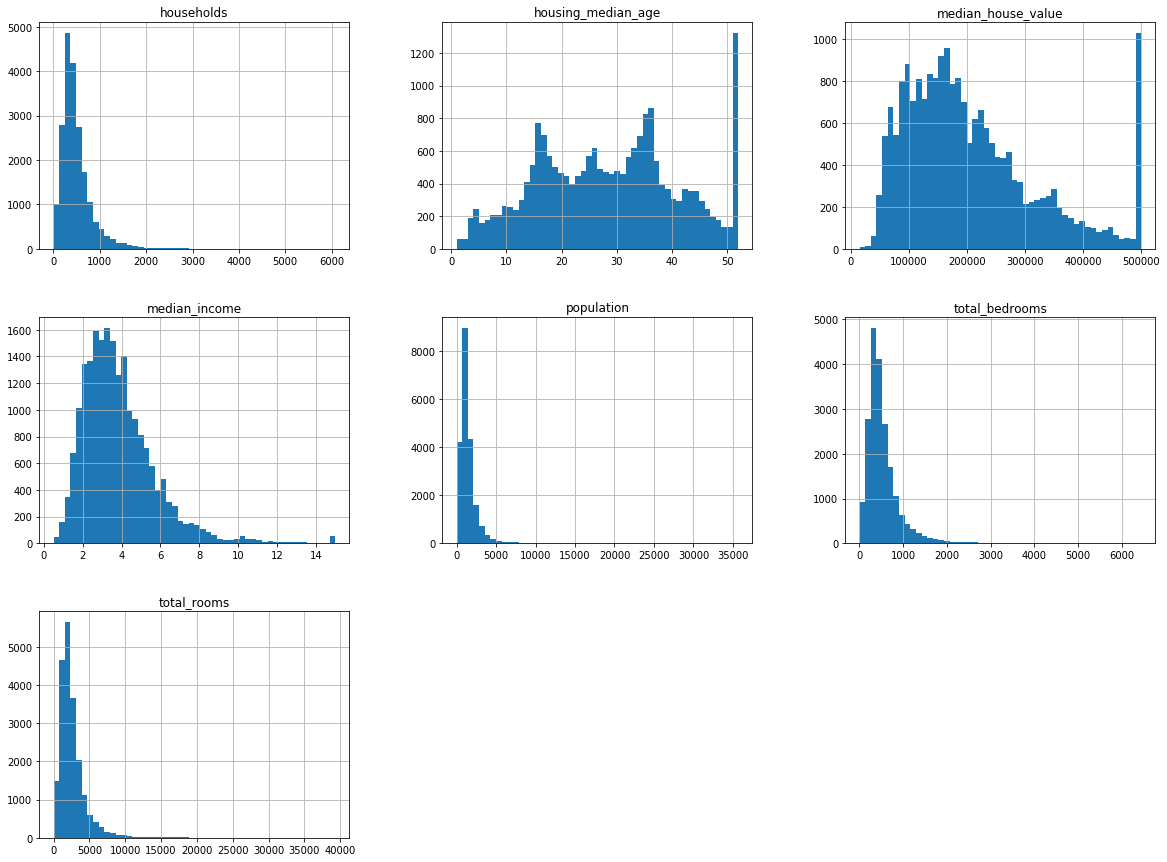

In [23]:
housing2.hist(bins=50, figsize=(20,15))

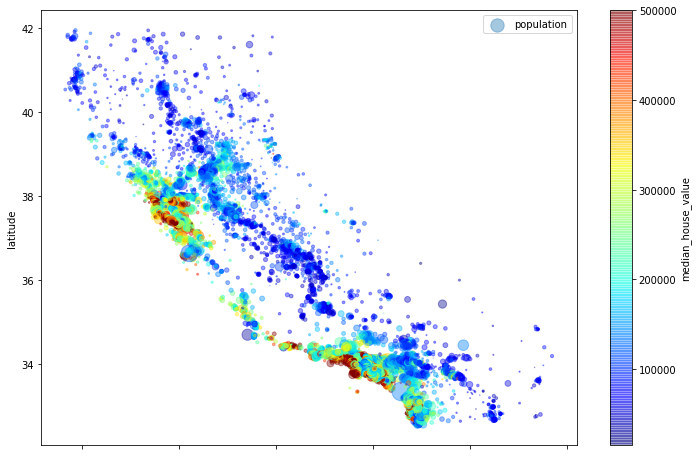

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, 
             label="population", c="median_house_value", figsize=(12,8),
             cmap=plt.get_cmap("jet"), colorbar=True)

# Data Cleaning

In [30]:
housing_x = housing2.drop(["median_house_value"], axis=1)
housing_labels = housing2["median_house_value"].copy()

In [31]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [32]:
housing.total_bedrooms = housing.total_bedrooms.fillna(housing['total_bedrooms'].mean())

In [34]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [35]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [36]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing["ocean_proximity"])
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [37]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [38]:
housing.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [39]:
pd.get_dummies(housing.ocean_proximity,prefix='ocean_proximity')

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [40]:
dummies=pd.get_dummies(housing.ocean_proximity,prefix='ocean_proximity')
housing = pd.concat([housing,dummies],axis=1)

In [41]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [42]:
housing.drop(['ocean_proximity'],axis=1, inplace=True)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
train,test = train_test_split(housing,test_size=0.20,random_state=42)


In [46]:
X_train = train.drop('median_house_value',axis=1)
y_train = train.median_house_value

In [47]:
X_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,0,0,0,0,1
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,0,0,0,0,1
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,0,0,0,0,1
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,0,0,0,0,1
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,0,1,0,0,0


In [48]:
y_train.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [49]:
X_test = test.drop('median_house_value',axis=1)
y_test = test.median_house_value

# Model building

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
model.score(X_train,y_train)


0.6496648627123223

In [54]:
pred=model.predict(X_test)

In [55]:
model.score(X_test,y_test)

0.6257351821159685

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test,pred)

0.6257351821159685

In [58]:
from sklearn.ensemble import RandomForestRegressor


In [59]:
rf_model = RandomForestRegressor()

In [61]:
rf_model.fit(X_train,y_train)


/home/ganesh/anaconda3/envs/env_3_6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
rf_model.score(X_train,y_train)

0.9642439612626666

In [63]:
rf_model.score(X_test,y_test)

0.8052160234867677

# Apply LR on advertising data set
# Check R2 Score
# Check if you can apply polynomial regression on adverting data